<a href="https://colab.research.google.com/github/Malcuthrad/Challenge-Alura-Store/blob/main/AluraStoreLatam_Antonio_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
import urllib.error
from IPython.display import display

In [27]:
def format_currency(amount):
    return '${:,.2f}'.format(amount)

total_facturacion_tienda_1 = sum(tienda["Precio"])
total_facturacion_tienda_2 = sum(tienda2["Precio"])
total_facturacion_tienda_3 = sum(tienda3["Precio"])
total_facturacion_tienda_4 = sum(tienda4["Precio"])

print(f"Facturación Total Tienda 1: {format_currency(total_facturacion_tienda_1)}")
print(f"Facturación Total Tienda 2: {format_currency(total_facturacion_tienda_2)}")
print(f"Facturación Total Tienda 3: {format_currency(total_facturacion_tienda_3)}")
print(f"Facturación Total Tienda 4: {format_currency(total_facturacion_tienda_4)}")


Facturación Total Tienda 1: $1,150,880,400.00
Facturación Total Tienda 2: $1,116,343,500.00
Facturación Total Tienda 3: $1,098,019,600.00
Facturación Total Tienda 4: $1,038,375,700.00


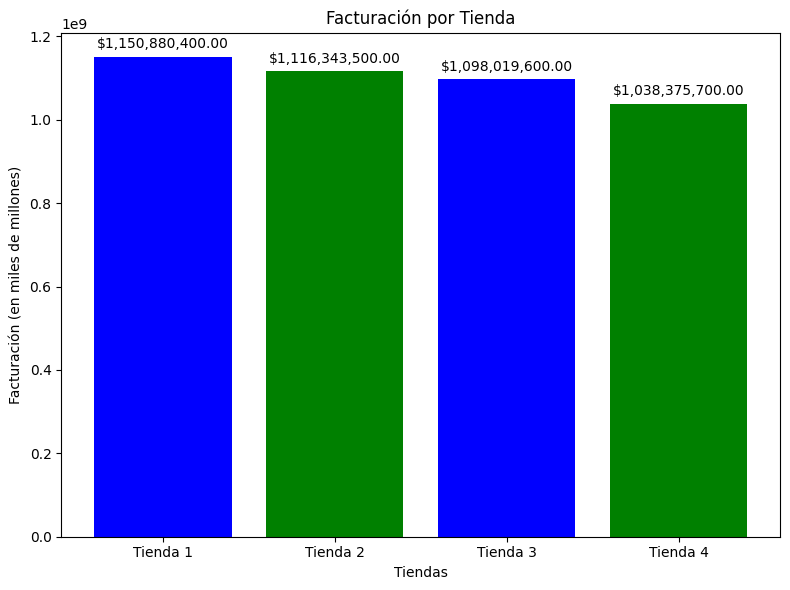

In [28]:
# Nombres de las tiendas y datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [total_facturacion_tienda_1, total_facturacion_tienda_2, total_facturacion_tienda_3, total_facturacion_tienda_4]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, facturacion, color=['blue', 'green'])

# Agregar título y etiquetas
plt.title('Facturación por Tienda')
plt.ylabel('Facturación (en miles de millones)')
plt.xlabel('Tiendas')

# Agregar los valores sobre cada barra
for i, valor in enumerate(facturacion):
    plt.text(i, valor + 20000000, f"${valor:,.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda